In [16]:
using Pkg

include(raw"C:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\HN_V2\scripts\intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random
using Cairo
using Fontconfig
using RSGraphics
using LaTeXStrings

Currently active project is: HN_V2

Path of active project: C:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [2]:
sim_time = 8
steps = 6000

parameters = Dict{String, Any}(
    "images" => [[1 1; 1 1]],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => []#,(1,2,-1),(3,4,1)]
)

Dict{String, Any} with 8 entries:
  "images"          => [[1 1; 1 1]]
  "scaling"         => 1.0
  "iterations"      => 100
  "steps"           => 6000
  "num_agitations"  => 1
  "initial_stimuli" => Any[]
  "sim_time"        => 8
  "delta"           => -0.00133333

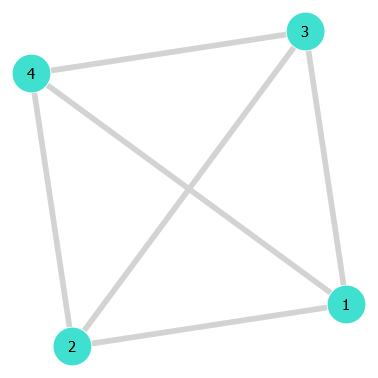

couldn't load font "Helvetica Not-Rotated 15.12px", falling back to "Sans Not-Rotated 15.12px", expect ugly output.couldn't load font "Helvetica 15.12px", falling back to "Sans 15.12px", expect ugly output.

In [7]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph))#, 
      #edgelabel=round.(elabels, digits=2),)

In [37]:
i_s = Dice.get_random_hybrid(4, 2.0)

(Int8[-1, 1, -1, 1], [0.1127636275785393, 0.3087089449542979, 0.04509596965748708, -0.1954563477911504])

In [38]:
function HN_Solver_Traj_test(parameters::Dict{String, Any}, initial_state::Dice.Hybrid, debug::Bool = false)
    # Just gets raw result, no visualizer

    scaling = parameters["scaling"] #Scaling coeff
    S = parameters["images"] # Images
    time_total= parameters["sim_time"] # how long the sim is
    num_steps = parameters["steps"] # number of steps in the sim
    dt_sim = parameters["delta"] # dt
    delta_t = time_total/num_steps
    traj_collection::Vector{Vector{Dice.Hybrid}} = []

    # Make Graph
    graph_set = get_HN_graph(S, scaling)
    
    # Making model
    model = Dice.Model(graph_set, Dice.model_2_hybrid_coupling, delta_t)

    # Making randomized initial state
    num_vertices = Graphs.nv(model.graph)
    
    converged = 0
    diverged = 0


    pinned::Vector{Tuple{Int64, Int8}} = []
    state::Dice.Hybrid = Dice.get_random_hybrid(num_vertices, 2.0)
    #println(reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    for stim in parameters["initial_stimuli"]
        # Every n entries is a column, thus taking # of columns and subtracting 1 brings you to where the column begins
        # Adding 1 will bring you to the first entry in the column and so on for +k
        pos = (stim[2]-1) * size(parameters["images"][1],1) + stim[1]
        state[1][pos] = stim[3]
        push!(pinned, (pos, stim[3]))
    end
    #println(state[1]
    traj = Dice.trajectories_pinned(model.graph, num_steps, dt_sim, model.coupling, state, pinned)
    push!(traj_collection, traj)
    # Comment out the other part of the or conditional to ignore negative images
 #=   if (reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        converged += 1
        global sol = state[1]
        break
    end =#

    
    if debug
        pretty_table(reshape(traj[end][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
    return(state,traj_collection)
end    

HN_Solver_Traj_test (generic function with 2 methods)

In [39]:
res = HN_Solver_Traj_test(parameters, i_s);

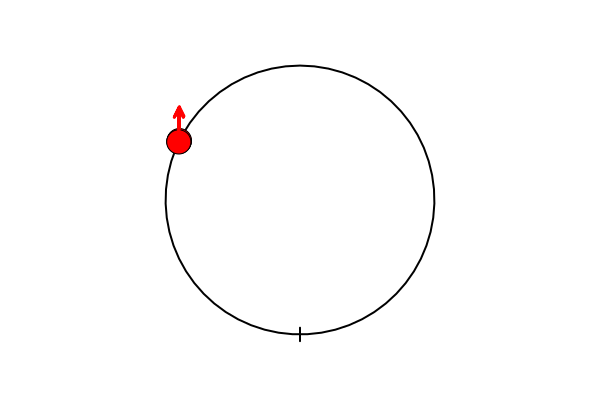

In [40]:
p1 = show_state(res[1][1], res[1][2])

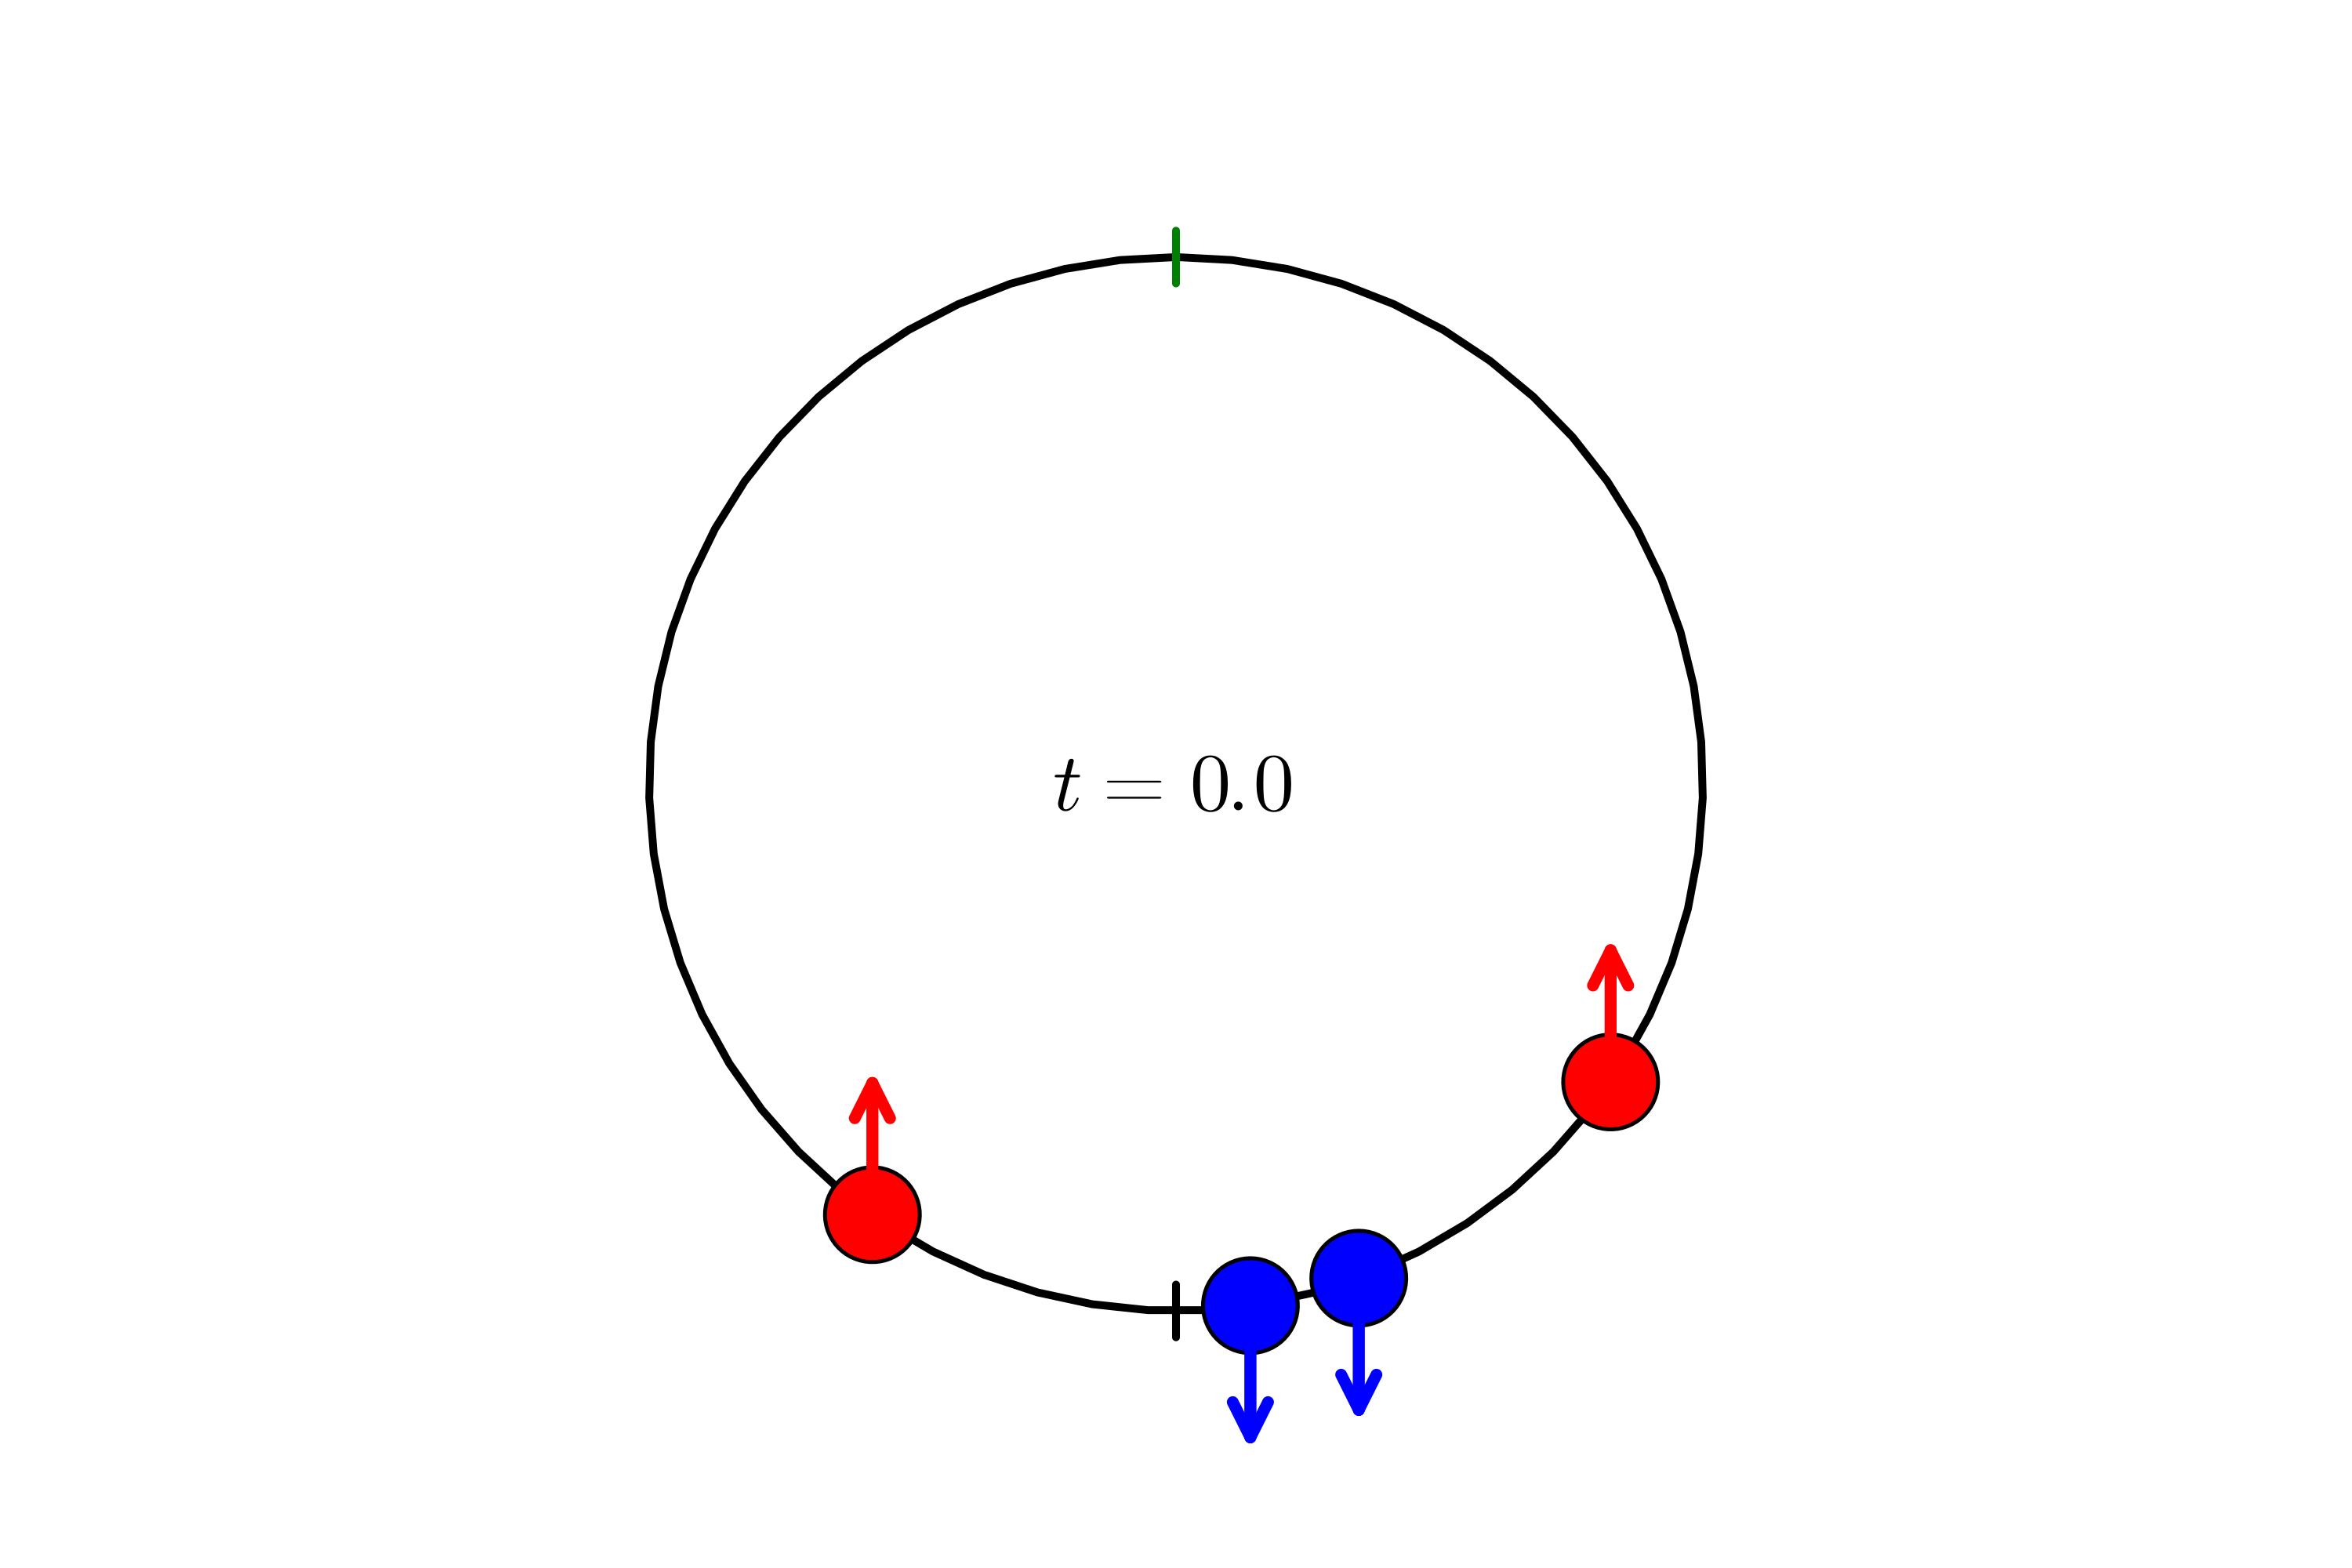

In [44]:
p0 = make_circle()
add_state(i_s[1], i_s[2])
RSGraphics.show_dash(0.0, 0.1)

# optional annotations can be added
t_label_x = 0.0
t_label_y = 0.0
t_label_str = "t = $(round(0.0, digits = 2))"
annotate!(t_label_x, t_label_y, latexstring(t_label_str))

RSGraphics.show_dash(1.0, 0.1, :green)

plot!(p0, dpi = 500)


In [49]:
savefig(p0, "poster_step2.png")

"C:\\Users\\qz202\\Downloads\\Share to Windows\\Share to Windows\\Research Professor\\Mikhail Erementchouk\\HN_V2\\scripts\\Poster Stuffs\\poster_step2.png"

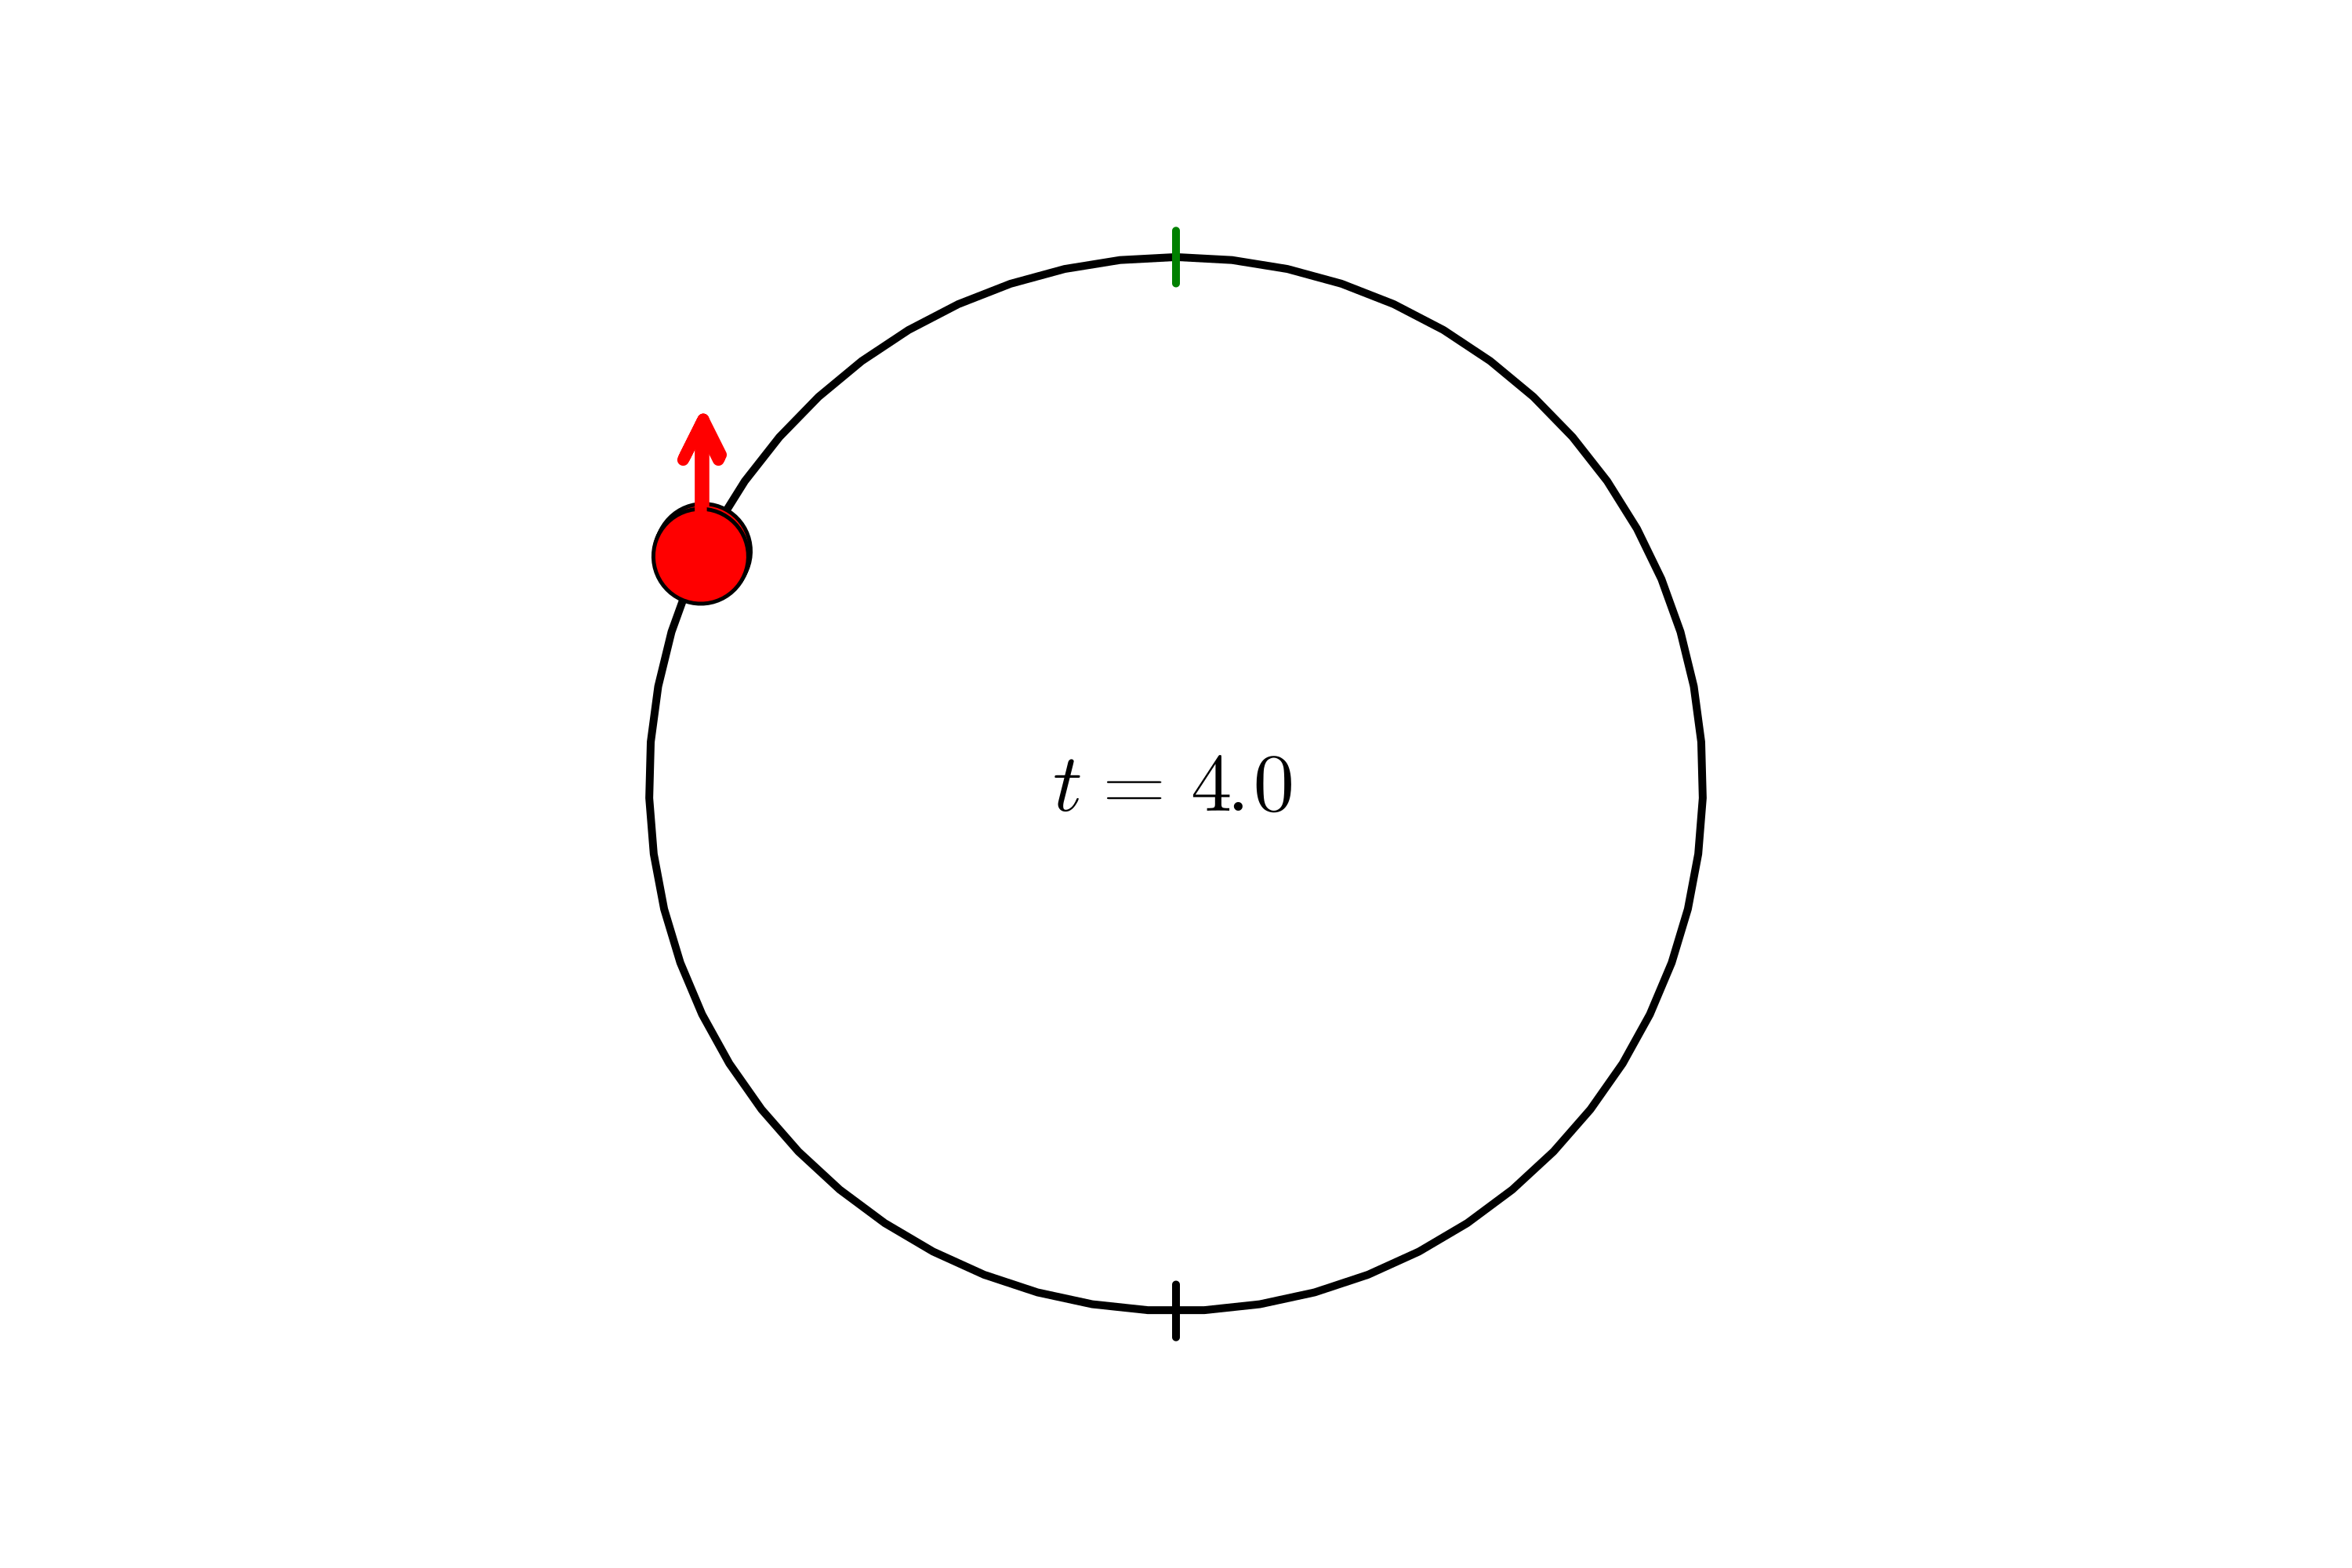

In [47]:
p1 = make_circle()
add_state(res[1][1], res[1][2])
RSGraphics.show_dash(0.0, 0.1)

# optional annotations can be added
t_label_x = 0.0
t_label_y = 0.0
t_label_str = "t = $(round(4.0, digits = 2))"
annotate!(t_label_x, t_label_y, latexstring(t_label_str))
RSGraphics.show_dash(1.0, 0.1, :green)

plot!(p1, dpi = 500)


In [48]:
savefig(p1, "poster_final.png")

"C:\\Users\\qz202\\Downloads\\Share to Windows\\Share to Windows\\Research Professor\\Mikhail Erementchouk\\HN_V2\\scripts\\Poster Stuffs\\poster_final.png"